## Load The Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('fake.csv')
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
sum=0
for i in df['subject']:
    if (i!='News'):
        sum+=1
print(sum)

14431


## Combine and Shuffle the Dataset

In [7]:

# Load the datasets
fake_df = pd.read_csv('fake.csv')
true_df = pd.read_csv('true.csv')

# Add a label column to each dataset
fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # Real news

# Combine the datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the combined dataset
df = df.sample(frac=1).reset_index(drop=True)

print(df.head())


                                               title  \
0  No breakthrough in Supreme Court dispute betwe...   
1  Germany calls for restraint, dialogue in Zimbabwe   
2   Everyone Is Wondering Just What James Comey W...   
3  Militant attack on minister's convoy kills two...   
4  CNN’s Don Lemon Tries to Downplay Horrific ‘An...   

                                                text       subject  \
0  WASHINGTON (Reuters) - Republican leaders of t...  politicsNews   
1  BERLIN (Reuters) - Germany called for all side...     worldnews   
2  After former FBI Director, James Comey was fir...          News   
3  SRINAGAR, India (Reuters) - Militants attacked...     worldnews   
4  In case you missed it, CNN anchor Don Lemon we...   Middle-east   

                  date  label  
0       March 1, 2016       1  
1   November 15, 2017       1  
2        June 11, 2017      0  
3  September 21, 2017       1  
4      January 6, 2017      0  


## Preprocess The Dataset

In [16]:
# Basic info
print(df.head())
print("Shape of the dataset:", df.shape)
print("\nColumns and data types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

                                               title  \
0  no breakthrough in supreme court dispute betwe...   
1   germany calls for restraint dialogue in zimbabwe   
2   everyone is wondering just what james comey w...   
3  militant attack on minister s convoy kills two...   
4  cnn s don lemon tries to downplay horrific ant...   

                                                text       subject  \
0  washington reuters republican leaders of the s...  politicsNews   
1  berlin reuters germany called for all sides to...     worldnews   
2  after former fbi director james comey was fire...          News   
3  srinagar india reuters militants attacked the ...     worldnews   
4  in case you missed it cnn anchor don lemon wen...   Middle-east   

                  date  label  \
0       March 1, 2016       1   
1   November 15, 2017       1   
2        June 11, 2017      0   
3  September 21, 2017       1   
4      January 6, 2017      0   

                                           

In [9]:
## lets clean the dataset to remove any special characters
## extra space and also convert all text into lower case.

import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r"\'", "'", text)  # Handle special characters
    return text

# Apply text cleaning
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

# Combine title and text
df['content'] = df['title'] + ' ' + df['text']

# Display the first few rows of the combined dataset with cleaned text
df.head()


,title,text,subject,date,label,content
0,no breakthrough in supreme court dispute betwe...,washington reuters republican leaders of the s...,politicsNews,"March 1, 2016",1,no breakthrough in supreme court dispute betwe...
1,germany calls for restraint dialogue in zimbabwe,berlin reuters germany called for all sides to...,worldnews,"November 15, 2017",1,germany calls for restraint dialogue in zimbab...
2,everyone is wondering just what james comey w...,after former fbi director james comey was fire...,News,"June 11, 2017",0,everyone is wondering just what james comey w...
3,militant attack on minister s convoy kills two...,srinagar india reuters militants attacked the ...,worldnews,"September 21, 2017",1,militant attack on minister s convoy kills two...
4,cnn s don lemon tries to downplay horrific ant...,in case you missed it cnn anchor don lemon wen...,Middle-east,"January 6, 2017",0,cnn s don lemon tries to downplay horrific ant...


## Data Analysis

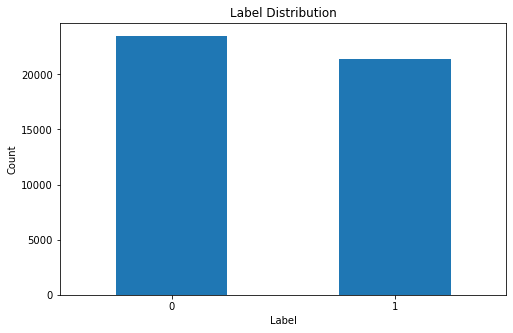


Label counts:
0    23481
1    21417
Name: label, dtype: int64


In [11]:
import matplotlib.pyplot as plt
# Label distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print("\nLabel counts:")
print(label_counts)

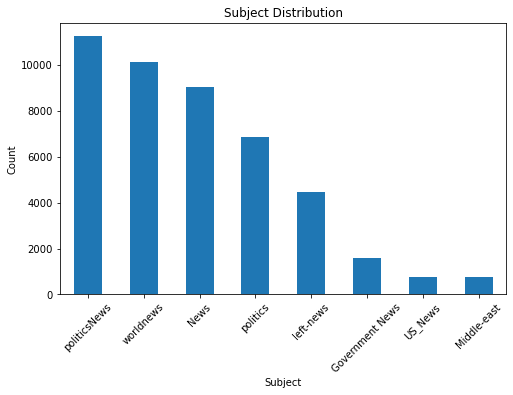

In [13]:
# Subject Analysis
subject_counts = df['subject'].value_counts()
plt.figure(figsize=(8, 5))
subject_counts.plot(kind='bar')
plt.title('Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Feature Extraction

In [9]:
## split the data into train and test.
## using tfdfvectorizer for converting the text into numerical features

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df['content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Model Training and Evaluation

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


# Predict on the test set
y_pred = lr_model.predict(X_test_tfidf)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9906
Precision: 0.9875
Recall: 0.9927
F1-score: 0.9901

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4758
           1       0.99      0.99      0.99      4222

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

